In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False ## 마이너스 부호 깨짐 방지

|컬럼 |내용|
|---|---|
sessionID | 세션 ID|
userID | 사용자 ID|
TARGET | 세션에서 발생한 총 조회수|
browser | 사용된 브라우저|
OS | 사용된 기기의 운영체제|
device | 사용된 기기|
new | 첫 방문 여부 (0: 첫 방문 아님, 1: 첫 방문)|
quality | 세션의 질 (거래 성사를 기준으로 측정된 값, 범위: 1~100)|
duration | 총 세션 시간 (단위: 초)|
bounced | 이탈 여부 (0: 이탈하지 않음, 1: 이탈함)|
transaction | 세션 내에서 발생의 거래의 수|
transaction_revenue | 총 거래 수익|
continent | 세션이 발생한 대륙|
subcontinent | 세션이 발생한 하위 대륙|
country | 세션이 발생한 국가|
traffic_source | 트래픽이 발생한 소스|
traffic_medium | 트래픽 소스의 매체|
keyword | 트래픽 소스의 키워드, 일반적으로 traffic_medium이 organic, cpc인 경우에 설정|
referral_path | traffic_medium이 referral인 경우 설정되는 경로|

## 데이터 로드 

In [3]:
data = pd.read_csv("/3차프로젝트/Weblog_Data/train.csv")
test_data = pd.read_csv("/3차프로젝트/Weblog_Data/test.csv")

data.tail()

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
252284,SESSION_252284,USER_206021,1.0,Chrome,Android,mobile,1,1.0,0.0,1,0.0,0.0,Europe,Northern Europe,United Kingdom,youtube.com,referral,NaN,Category5_Path_0032
252285,SESSION_252285,USER_206022,1.0,Chrome,Macintosh,desktop,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
252286,SESSION_252286,USER_164240,5.0,Chrome,Macintosh,desktop,0,2.0,69.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,Category1
252287,SESSION_252287,USER_206023,1.0,Android Webview,Android,mobile,1,1.0,28.0,0,0.0,0.0,Africa,Northern Africa,Egypt,youtube.com,referral,NaN,Category2_Path_0018
252288,SESSION_252288,USER_161023,6.0,Chrome,Macintosh,desktop,0,5.0,77.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,Category1


## 데이터 EDA
keyword, referral_path 에서 결측치가 존재하는 것을 확인

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252289 entries, 0 to 252288
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sessionID            252289 non-null  object 
 1   userID               252289 non-null  object 
 2   TARGET               252289 non-null  float64
 3   browser              252289 non-null  object 
 4   OS                   252289 non-null  object 
 5   device               252289 non-null  object 
 6   new                  252289 non-null  int64  
 7   quality              252289 non-null  float64
 8   duration             252289 non-null  float64
 9   bounced              252289 non-null  int64  
 10  transaction          252289 non-null  float64
 11  transaction_revenue  252289 non-null  float64
 12  continent            252289 non-null  object 
 13  subcontinent         252289 non-null  object 
 14  country              252289 non-null  object 
 15  traffic_source   

In [5]:
# duration,transaction_revenue 등 값의 범위가 매우 크기 때문에 데이터 스케일링을 진행할 필요성이 있어보인다. 
data.describe()

,TARGET,new,quality,duration,bounced,transaction,transaction_revenue
count,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,2.522890e+05
mean,3.592626,0.751955,3.816805,113.104253,0.493672,0.009033,9.061248e+05
std,5.509465,0.431879,11.091028,330.876019,0.499961,0.100938,2.127689e+07
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000e+00
75%,4.000000,1.000000,1.000000,71.000000,1.000000,0.000000,0.000000e+00
max,386.000000,1.000000,98.000000,11186.000000,1.000000,12.000000,3.325712e+09


In [6]:
## userID에 중복이 존재한다. (나머지는 중복이 있지만, 카테고리.)
data.describe(include='object')

,sessionID,userID,browser,OS,device,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
count,252289,252289,252289,252289,252289,252289,252289,252289,252289,252289,114614,91182
unique,252289,206024,70,21,3,6,23,205,168,7,623,1578
top,SESSION_000000,USER_002675,Chrome,Windows,desktop,Americas,Northern America,United States,google,organic,Category8,Category1
freq,1,78,174395,88119,167133,126506,111945,104201,116007,107370,103584,18687


### 갯수가 확인해볼 수 있는 범주형 변수 데이터 확인

In [7]:
## browser 
'''
브라우저로 해석하기 어려운 데이터가 존재 따라서 전처리를 하면 좋을 듯 - 비식별 데이터가 있다.
1. 유명한 브라우저와 아닌 것으로 이진 분류로 변환
2. 제대로 확인 가능한 브라우저랑 아닌 것을 '미상' 등으로 축소를 하고 변환
'''
data.browser.unique()

array(['Chrome', 'Samsung Internet', 'Firefox', 'Opera',
       'Safari (in-app)', 'Edge', 'Safari', 'Android Webview',
       'UC Browser', 'Internet Explorer', 'Opera Mini', 'BlackBerry',
       'Android Browser', 'Amazon Silk', 'Coc Coc', 'YaBrowser',
       'Nintendo Browser', 'Nokia Browser', 'MRCHROME', 'Puffin',
       'Mozilla Compatible Agent', 'Maxthon', '+Simple Browser',
       'Apple-iPhone7C2', 'Playstation Vita Browser',
       'osee2unifiedRelease', 'SAMSUNG-SM-B355E Opera', 'DESKTOP', 'Iron',
       'Browser', 'rpfanjzoxyemsgbtichqkudwlv',
       'cajrnbtvqwfkolzyxushpdgime', 'wvsmagudcqeytijorlhxnfzkbp',
       'efkaxnbyohqtspzlvcwrjmigdu', 'bsfnwveckhgpdoyjxmizruqtla',
       'Mozilla', 'Konqueror', 'Netscape', 'Amazon.com', 'SeaMonkey',
       ';__CT_JOB_ID__:76fd1acb-e365-43c0-b967-908bcf5d5b59;',
       'eosutpkiahjzvdgcwxlmyfqbrn', 'cnwmpegudakrqzljtvfxohbysi',
       'fspmihbxzowgnuctrqykjlvade', 'YE',
       ';__CT_JOB_ID__:7e575295-571e-4e82-9254-7f2c8bbb9183;

In [8]:
## OS
'''
(not set) 와 Xbox (게임기 아닌가? 이런 데이터가 중요하거나 데이터가 많을까?)
밑에서 확인해본 결과 크게 중요하지 않고 데이터의 크기도 적다 따라서 그런 데이터를 모아서 축소하는게 좋을 것 같다. 
'''
data.OS.unique()

# ## 1로 조회수가 매우 작은 것을 알 수 있다. 
# data[data['OS'] == '(not set)']['TARGET'].value_counts()
# ### 크기도 작고 별로 중요하지 않다고 판단됨
# data[data['OS'] == 'Xbox']['TARGET'].value_counts()
# data[data['OS'] == 'Playstation Vita']['TARGET'].value_counts()

array(['Macintosh', 'Windows', 'Android', 'iOS', 'Linux', 'Tizen',
       'Chrome OS', 'BlackBerry', '(not set)', 'Xbox', 'Samsung',
       'Windows Phone', 'OS/2', 'Nintendo 3DS', 'Playstation Vita',
       'FreeBSD', 'SunOS', 'Nintendo WiiU', 'Firefox OS', 'SymbianOS',
       'Nokia'], dtype=object)

In [9]:
## device
'''
3개 one-hot을 사용해도 괜찮을 것 같다. 
'''
data.device.unique()

# data[data['device'] == 'tablet']['TARGET'].value_counts()
# data[data['device'] == 'mobile']['TARGET'].value_counts()
# data[data['device'] == 'desktop']['TARGET'].value_counts()

array(['desktop', 'mobile', 'tablet'], dtype=object)

In [10]:
## continent
'''
6개 one-hot을 사용해도 괜찮을 것 같다. 
'''
data.continent.unique()

array(['Americas', 'Europe', 'Asia', 'Africa', 'Oceania', '(not set)'],
      dtype=object)

In [11]:
## subcontinent
'''
데이터가 너무 많아서 어떻게 할 지 고민
'''
data.subcontinent.unique()

array(['Northern America', 'Western Europe', 'Southeast Asia',
       'Southern Europe', 'South America', 'Central America',
       'Northern Europe', 'Eastern Europe', 'Eastern Asia',
       'Southern Asia', 'Western Asia', 'Northern Africa', 'Australasia',
       'Southern Africa', 'Eastern Africa', 'Western Africa', 'Caribbean',
       '(not set)', 'Polynesia', 'Middle Africa', 'Micronesian Region',
       'Central Asia', 'Melanesia'], dtype=object)

In [12]:
## country
'''
데이터가 너무 많아서 어떻게 할 지 고민
'''
data.country.unique()

array(['United States', 'Germany', 'Malaysia', 'Greece', 'Brazil',
       'Italy', 'Mexico', 'Laos', 'United Kingdom', 'Philippines',
       'Bulgaria', 'Russia', 'Poland', 'China', 'Romania', 'Belgium',
       'India', 'United Arab Emirates', 'Portugal', 'Canada', 'Algeria',
       'Egypt', 'Pakistan', 'Japan', 'Australia', 'South Africa',
       'Turkey', 'Austria', 'New Zealand', 'Singapore', 'Taiwan',
       'France', 'Saudi Arabia', 'Colombia', 'Ecuador', 'Thailand',
       'Vietnam', 'Sweden', 'Sri Lanka', 'South Korea', 'Kuwait', 'Kenya',
       'Bolivia', 'Spain', 'Hong Kong', 'Bangladesh', 'Serbia',
       'Netherlands', 'El Salvador', 'Czechia', 'Peru', 'Ukraine',
       'Réunion', 'Israel', 'Nepal', 'Ireland', 'Indonesia', 'Argentina',
       'Finland', 'Hungary', 'Switzerland', 'Qatar', 'Georgia', 'Nigeria',
       'Oman', 'Benin', 'Belarus', 'Côte d’Ivoire', 'Dominican Republic',
       'Denmark', 'Morocco', 'Macau', 'Slovakia', 'Guatemala', 'Norway',
       'Armenia', 'Su

In [13]:
'''
해당 데이터는 google로 텍스트 전처리를 통해서 사이트만 가지고 카테고리를 만들어도 괜찮을 수도 있다. 
e.g) google.co.jp == google == google.com 이기 때문에 google로 한 개를 만드는 것
'''
data.traffic_source.unique()

array(['google', '(direct)', 'Partners', 'groups.google.com',
       'youtube.com', 'google.com', 'bing', 'google.co.jp',
       'analytics.google.com', 'baidu', 'quora.com',
       'googleads.g.doubleclick.net', 'pinterest.com', 'mail.google.com',
       'dealspotr.com', 'qiita.com', 'l.facebook.com', 'reddit.com',
       'sites.google.com', 'blog.golang.org', 'support.google.com',
       'yahoo', 'dfa', 't.co', 'lunametrics.com', 'docs.google.com',
       'adwords.google.com', 's0.2mdn.net', 'm.baidu.com',
       'm.facebook.com', 'int.search.tb.ask.com', 'google.com.br',
       'google.es', 'arstechnica.com', 'msn.com', 'tw.search.yahoo.com',
       'facebook.com', 'google.de', 'hangouts.google.com',
       'duckduckgo.com', 'r.search.aol.com', 'my.yahoo.com',
       'google.co.za', 'au.search.yahoo.com', 'in.search.yahoo.com',
       'outlook.live.com', 'productforums.google.com', 'ask',
       'google.co.id', 'google.co.uk', 'myactivity.google.com',
       'google.com.ua', 'google

In [14]:
'''
7개 one-hot을 사용해도 괜찮을 것 같다. 
'''
data.traffic_medium.unique()

array(['organic', '(none)', 'affiliate', 'referral', 'cpc', 'cpm',
       '(not set)'], dtype=object)

In [15]:
data[data['traffic_medium']=='cpm']['TARGET'].describe()

count    501.000000
mean       3.047904
std        4.424670
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       34.000000
Name: TARGET, dtype: float64

In [16]:
data.keyword.unique()

array(['Category8', nan, 'Category9', 'Category1_Keyword_000',
       'Category1_Keyword_001', 'Category10', 'Category1_Keyword_002',
       'Category6_Keyword_003', 'Category2_Keyword_004',
       'Category2_Keyword_005', 'Category1_Keyword_006',
       'Category2_Keyword_007', 'Category11', 'Category2_Keyword_008',
       'Category2_Keyword_009', 'Category4_Keyword_010',
       'Category1_Keyword_011', 'Category6_Keyword_012',
       'Category3_Keyword_013', 'Category2_Keyword_014',
       'Category2_Keyword_015', 'Category3_Keyword_016',
       'Category1_Keyword_017', 'Category6_Keyword_018',
       'Category2_Keyword_019', 'Category1_Keyword_020',
       'Category2_Keyword_021', 'Category2_Keyword_022',
       'Category2_Keyword_023', 'Category2_Keyword_024',
       'Category1_Keyword_025', 'Category2_Keyword_026',
       'Category1_Keyword_027', 'Category4_Keyword_028',
       'Category2_Keyword_029', 'Category4_Keyword_030',
       'Category4_Keyword_031', 'Category2_Keyword_032

In [17]:
cate = []

for i in range(1, len(data.referral_path.unique().tolist())):
    cate.append(data.referral_path.unique().tolist()[i].split('_')[0])

print(set(cate))

{'Category3', 'Category5', 'Category1', 'Category4', 'Category10', 'Category6', 'Category13', 'Category11', 'Category12', 'Category7', 'Category8', 'Category2', 'Category9'}


### 결측치
keyword, referral_path 결측치가 너무 많아 삭제하기에는 데이터 손실로 인하여 대체법 생각

In [18]:
data.isnull().sum()

sessionID                   0
userID                      0
TARGET                      0
browser                     0
OS                          0
device                      0
new                         0
quality                     0
duration                    0
bounced                     0
transaction                 0
transaction_revenue         0
continent                   0
subcontinent                0
country                     0
traffic_source              0
traffic_medium              0
keyword                137675
referral_path          161107
dtype: int64

### 범주형 중복 데이터 확인

In [19]:
# object_col = data.describe(include ='object').columns.tolist()

# for col in object_col:
#     print(f"{col}중복 데이터:{sum(data[col].duplicated())}")

### 데이터 시각화

#### 연속형 데이터 시각화
많은 이상치가 존재한다. 따라서 이상치를 각각 처리를 고민해야 된다.

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


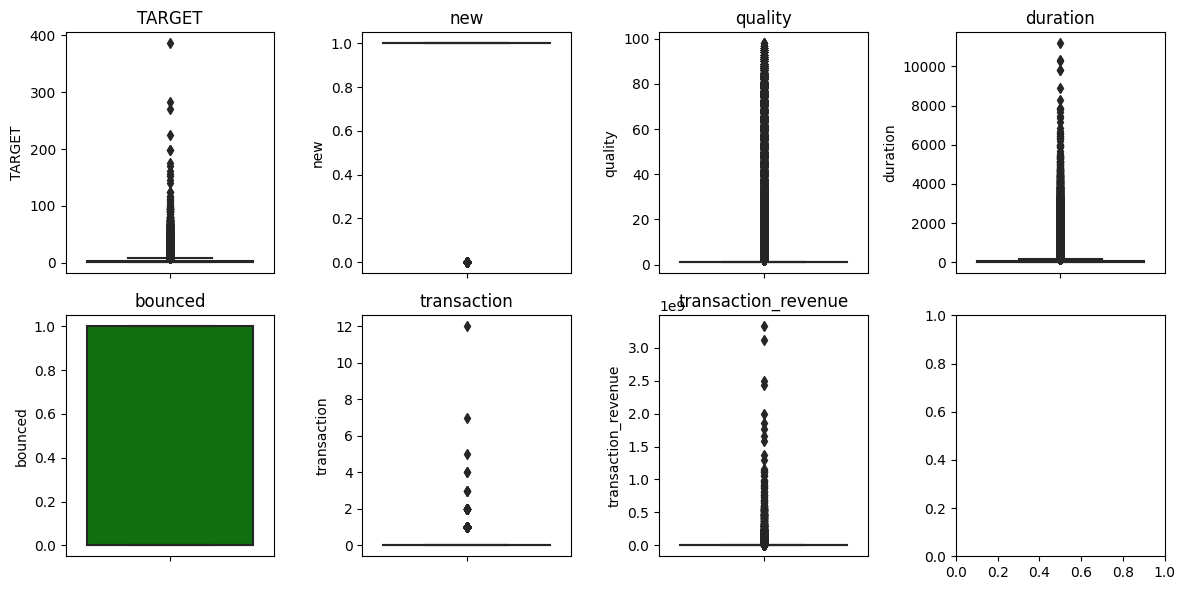

In [20]:
num_cols = data.describe().columns.tolist()
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

## 박스플롯
for idx, col in enumerate(num_cols):
    sns.boxplot(y=data[col], ax=axes[idx//4, idx%4], color='g') 
    axes[idx//4, idx%4].set_title(col)
 
plt.tight_layout()
plt.show()

#### 범주형 데이터 시각화

/home/t11user4/.conda/envs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  if sys.path[0] == "":


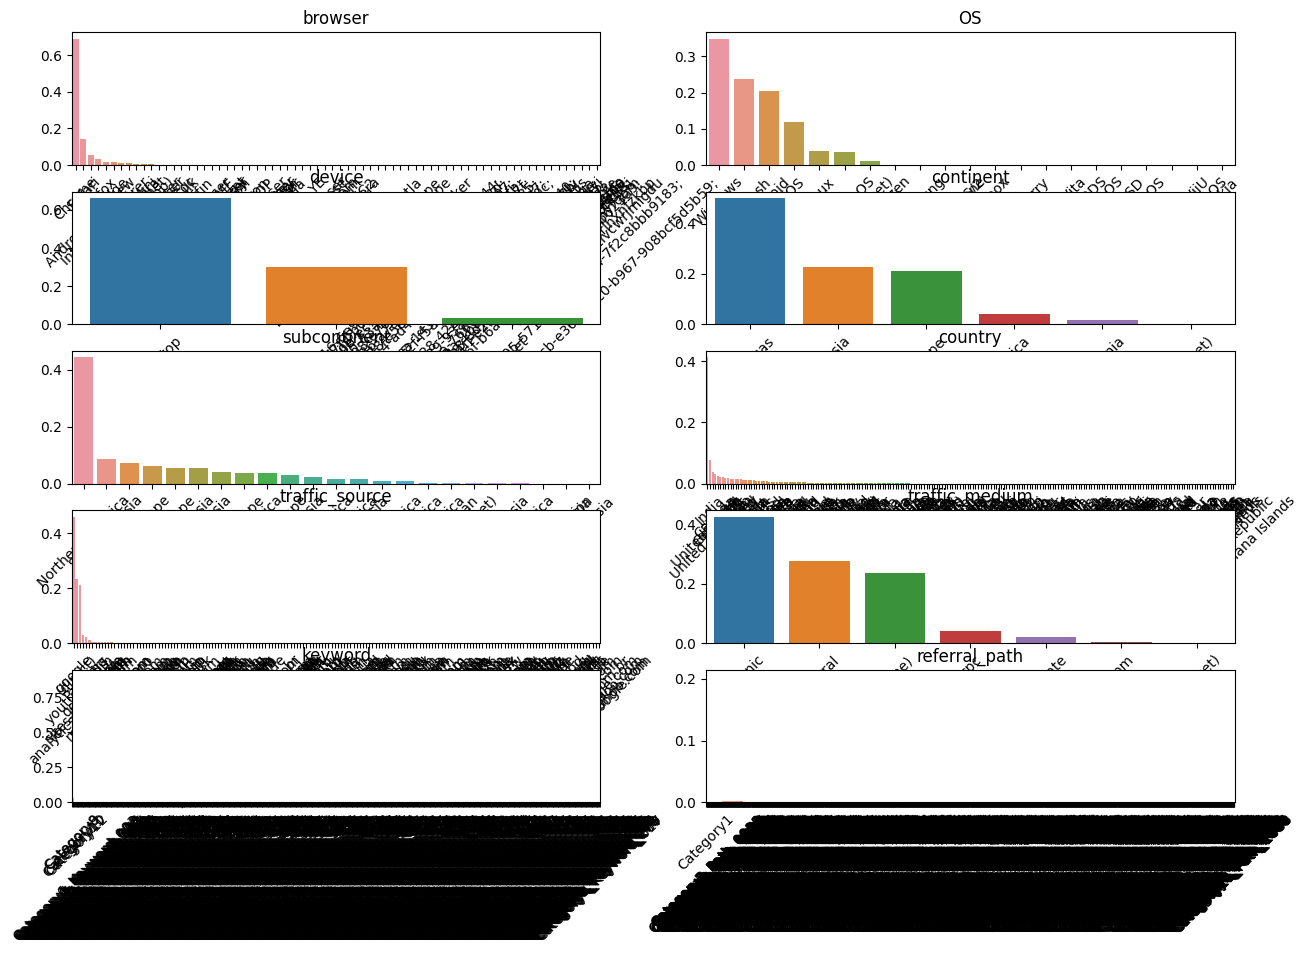

In [21]:
object_col = data.describe(include ='object').columns.tolist()[2:]
fig, axes = plt.subplots(5, 2, figsize=(15, 10))

for i, col in enumerate(object_col):  
    counts = data[col].value_counts(normalize=True).values
    categories = data[col].value_counts(normalize=True).index
    
    sns.barplot(x=categories, y=counts, ax=axes[i//2, i%2])
    axes[i//2, i%2].tick_params(axis='x', rotation=45)
    axes[i//2, i%2].set_title(col)
    
plt.tight_layout()
plt.show()

## 데이터 전처리

### 데이터 스케일

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, QuantileTransformer

minmax_scaler = MinMaxScaler()

standard_scaler = StandardScaler()

robust_scaler = RobustScaler()

maxabs_scaler = MaxAbsScaler()

quantile_scaler = QuantileTransformer()

## 데이터 분리 - Hold_out

In [37]:
## 데이터 분할
X = data.drop(['sessionID', 'userID', 'TARGET'],axis=1)
Y = data.TARGET

In [38]:
from sklearn.model_selection import train_test_split

## 연속형 데이터로 모델 학습
x = X.select_dtypes(exclude='object')

## 데이터 스케일링 적용
x_scale = minmax_scaler.fit_transform(x)

## 학습용 데이터 생성
x_train, x_valid, y_train, y_valid = train_test_split(x_scale, Y, test_size=0.2, shuffle=True, random_state=1106)

## 모델 파트

In [39]:
from sklearn.metrics import mean_squared_error

### RandomForestRegressor 모델 생성

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

In [41]:
# 모델 생성
rf_model = RandomForestRegressor(random_state=1106, n_jobs=-1)

## 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

### 랜덤 서치

In [42]:
# 랜덤 서치 객체 생성
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=10, n_jobs=-1, cv=KFold(n_splits=5, shuffle=True))

# 랜덤 서치 수행
random_search.fit(x_train, y_train)

# 최적의 하이퍼파라미터와 평가 점수 출력
print("최적의 하이퍼파라미터:", random_search.best_params_)
print("최고의 평가 점수:", random_search.best_score_)

최적의 하이퍼파라미터: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
최고의 평가 점수: 0.6756761880956175


### 그리드 서치

In [307]:
# 그리드 서치 객체 생성
grid_search = GridSearchCV(rf_model, param_grid=param_grid, n_jobs=-1, cv=KFold(n_splits=3, shuffle=True))

# 그리드 서치 수행
grid_search.fit(x_train, y_train)

# 최적의 하이퍼파라미터와 평가 점수 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고의 평가 점수:", grid_search.best_score_)

최적의 하이퍼파라미터: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
최고의 평가 점수: 0.677775972561395


#### 모델 학습

In [392]:
# 랜덤포레스트 학습
rf_model = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100)
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      random_state=0)

#### 모델 성능 평가

In [393]:
# 훈련 세트의 예측값 계산
y_train_pred = rf_model.predict(x_train)

# 검증 세트의 예측값 계산
y_valid_pred = rf_model.predict(x_valid)

# RMSE 계산
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

print("훈련 세트 RMSE: {:.2f}".format(train_rmse))
print("검증 세트 RMSE: {:.2f}".format(valid_rmse))

훈련 세트 RMSE: 2.89
검증 세트 RMSE: 2.93


#### 모델 예측

In [396]:
test_data = test_data.drop(columns=['sessionID', 'userID'],axis=1)
test_data

,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,Chrome,Linux,desktop,1,75.0,698.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,Category1
1,Safari,iOS,tablet,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
2,Chrome,Windows,desktop,1,1.0,33.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category2_Path_0082
3,Chrome,Android,mobile,1,1.0,76.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
4,Internet Explorer,Windows Phone,mobile,1,2.0,372.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category11_Path_0088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79781,Internet Explorer,Windows,tablet,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,search.xfinity.com,referral,NaN,Category1
79782,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
79783,Safari,Macintosh,desktop,1,1.0,22.0,0,0.0,0.0,Oceania,Australasia,Australia,google,organic,Category8,NaN
79784,Safari,iOS,mobile,1,1.0,135.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN


In [397]:
## 연속형 데이터로 모델 학습
test_data = test_data.select_dtypes(exclude='object')

## 데이터 스케일링 적용
test_data_scale = minmax_scaler.transform(test_data)

In [398]:
preds = rf_model.predict(test_data_scale)

#### Submission

In [399]:
submission = pd.read_csv('D:/3차프로젝트/Weblog_Data/sample_submission.csv')
submission

,sessionID,TARGET
0,SESSION_252289,0
1,SESSION_252290,0
2,SESSION_252291,0
3,SESSION_252292,0
4,SESSION_252293,0
...,...,...
79781,SESSION_332070,0
79782,SESSION_332071,0
79783,SESSION_332072,0
79784,SESSION_332073,0


In [400]:
submission['TARGET'] = preds
submission

,sessionID,TARGET
0,SESSION_252289,22.390578
1,SESSION_252290,1.000000
2,SESSION_252291,2.867358
3,SESSION_252292,4.120982
4,SESSION_252293,6.992047
...,...,...
79781,SESSION_332070,1.000000
79782,SESSION_332071,1.000000
79783,SESSION_332072,2.619500
79784,SESSION_332073,5.227857


In [401]:
submission.to_csv('./rf_model_scaling_submission.csv', index=False)

### LinearRegression 모델 생성

In [402]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

#### 모델 학습

In [403]:
model = LinearRegression()
model.fit(x_train, y_train)

print("가중치(계수, 기울기 파라미터 W) :", model.coef_)
print("편향(절편 파라미터 b) :", model.intercept_)

print("훈련세트 점수: {:.2f}".format(model.score(x_train, y_train)))
print("검증세트 점수: {:.2f}".format(model.score(x_valid, y_valid)))

가중치(계수, 기울기 파라미터 W) : [ 0.6911638  20.03720965 59.48983856 -2.78850778 22.16863428 13.16450617]
편향(절편 파라미터 b) : 3.249948548072437
훈련세트 점수: 0.57
검증세트 점수: 0.59


In [404]:
model2 = Ridge(alpha=.5)
model2.fit(x_train, y_train)

print("가중치(계수, 기울기 파라미터 W) :", model2.coef_)
print("편향(절편 파라미터 b) :", model2.intercept_)

print("훈련 세트 점수: {:.2f}".format(model2.score(x_train, y_train)))
print("검증 세트 점수: {:.2f}".format(model2.score(x_valid, y_valid)))

가중치(계수, 기울기 파라미터 W) : [ 0.69117516 20.08879311 59.27578727 -2.79121151 21.37861057 12.75294049]
편향(절편 파라미터 b) : 3.252649634641273
훈련 세트 점수: 0.57
검증 세트 점수: 0.59


#### 모델 성능 평가

In [405]:
from sklearn.metrics import mean_squared_error

# 훈련 세트의 예측값 계산
y_train_pred = model.predict(x_train)

# 검증 세트의 예측값 계산
y_valid_pred = model.predict(x_valid)

# RMSE 계산
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

print("훈련 세트 RMSE: {:.2f}".format(train_rmse))
print("검증 세트 RMSE: {:.2f}".format(valid_rmse))

훈련 세트 RMSE: 3.63
검증 세트 RMSE: 3.39


In [406]:
# 훈련 세트의 예측값 계산
y_train_pred = model2.predict(x_train)

# 검증 세트의 예측값 계산
y_valid_pred = model2.predict(x_valid)

# RMSE 계산
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

print("훈련 세트 RMSE: {:.2f}".format(train_rmse))
print("검증 세트 RMSE: {:.2f}".format(valid_rmse))

훈련 세트 RMSE: 3.63
검증 세트 RMSE: 3.39


#### 모델 예측

In [279]:
test_data = test_data.drop(columns=['sessionID','userID'],axis=1)
test_data

,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,Chrome,Linux,desktop,1,75.0,698.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,Category1
1,Safari,iOS,tablet,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
2,Chrome,Windows,desktop,1,1.0,33.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category2_Path_0082
3,Chrome,Android,mobile,1,1.0,76.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
4,Internet Explorer,Windows Phone,mobile,1,2.0,372.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category11_Path_0088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79781,Internet Explorer,Windows,tablet,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,search.xfinity.com,referral,NaN,Category1
79782,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
79783,Safari,Macintosh,desktop,1,1.0,22.0,0,0.0,0.0,Oceania,Australasia,Australia,google,organic,Category8,NaN
79784,Safari,iOS,mobile,1,1.0,135.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN


In [280]:
## 연속형 데이터로 모델 학습
test_data = test_data.select_dtypes(exclude='object')

## 데이터 스케일링 적용
test_data_scale = minmax_scaler.transform(test_data)

In [407]:
preds = model.predict(test_data_scale)

#### Submission

In [408]:
submission = pd.read_csv('D:/3차프로젝트/Weblog_Data/sample_submission.csv')
submission

,sessionID,TARGET
0,SESSION_252289,0
1,SESSION_252290,0
2,SESSION_252291,0
3,SESSION_252292,0
4,SESSION_252293,0
...,...,...
79781,SESSION_332070,0
79782,SESSION_332071,0
79783,SESSION_332072,0
79784,SESSION_332073,0


In [409]:
submission['TARGET'] = preds
submission

,sessionID,TARGET
0,SESSION_252289,22.939363
1,SESSION_252290,0.461441
2,SESSION_252291,4.116614
3,SESSION_252292,4.345299
4,SESSION_252293,6.126067
...,...,...
79781,SESSION_332070,1.152605
79782,SESSION_332071,1.152605
79783,SESSION_332072,4.058114
79784,SESSION_332073,4.659075


In [410]:
submission.to_csv('./linear_scaling_submission.csv', index=False)